## 10000 US Fast Food Restaurant Data Analysis


1. [Introduction to Dataset and Research Question](#section1)<br/>
   
2. [Data Wrangling](#section2)<br/>

3. [Exploratory Data Analysis](#section3)<br/>

4. [Conclusion](#section4)<br/>
     

<a id=section1></a>

# Introduction

In this project I will analyse Fast Food Restaurant data set across US 

Research Questions (Q):
1. Spread of Restaurant across whole US? 
2. Top 10 Restaurant?
3. Top 10 cities?
4. what are the contribution percentage of top 10 Restaurant?
5. What are the contribution percentage of top 10 Cities?
6. Spread of other restaurant across US?

Research Hypotheses/Conclusion :
1. Mcdonalds is the highest available Restaurant.
2. Cincinatti is the City with highest number of resturant.
3. Eastern US has more number of restaurant.
4. California has the highest number of restaurant in Western US.

<a id=section2></a>

## Data Wrangling
1. Installing packages for importing required libraries
2. Load data 
3. Get General info 
4. Overview Identify problems and actions to analyse research questions

In [1]:
!pip install plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import string
import seaborn as sns                                              
%matplotlib inline
sns.set()

from subprocess import check_output

C:\Users\Kuntol\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Kuntol\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Kuntol\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Kuntol\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Kuntol\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Kuntol\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Use

Loading the data from CSV File

In [2]:
Restaurant_Data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/FastFoodRestaurants.csv")

In [3]:
Restaurant_Data.shape              #Shape gives total number of rows and coloumn, In Restaurant_Data, there are 10,000 rows and 10 coloumns

(10000, 10)

In [4]:
Restaurant_Data.columns            #Name of all coloumns

Index(['address', 'city', 'country', 'keys', 'latitude', 'longitude', 'name',
       'postalCode', 'province', 'websites'],
      dtype='object')

In [5]:
Restaurant_Data.head()                          #head of the dataset

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."


In [6]:
Restaurant_Data['name'].nunique()

548

In [7]:
Restaurant_Data.tail()          #Tail of the dataset

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
9995,3013 Peach Orchard Rd,Augusta,US,us/ga/augusta/3013peachorchardrd/-791445730,33.415257,-82.024531,Wendy's,30906,GA,"http://www.wendys.com,http://wendys.com"
9996,678 Northwest Hwy,Cary,US,us/il/cary/678northwesthwy/787691191,42.217300,-88.255800,Lee's Oriental Martial Arts,60013,IL,http://www.mcdonalds.com
9997,1708 Main St,Longmont,US,us/co/longmont/1708mainst/-448666054,40.189190,-105.101720,Five Guys,80501,CO,http://fiveguys.com
9998,67740 Highway 111,Cathedral City,US,us/ca/cathedralcity/67740highway111/-981164808,33.788640,-116.482150,El Pollo Loco,92234,CA,"http://www.elpolloloco.com,http://elpolloloco.com"
9999,5701 E La Palma Ave,Anaheim,US,us/ca/anaheim/5701elapalmaave/554191587,33.860074,-117.789762,Carl's Jr.,92807,CA,http://www.carlsjr.com


In [8]:
Restaurant_Data.info()                                      #Gives index, DataType and memory usage 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
address       10000 non-null object
city          10000 non-null object
country       10000 non-null object
keys          10000 non-null object
latitude      10000 non-null float64
longitude     10000 non-null float64
name          10000 non-null object
postalCode    10000 non-null object
province      10000 non-null object
websites      9535 non-null object
dtypes: float64(2), object(8)
memory usage: 781.3+ KB


In [9]:
Restaurant_Data.describe(include='all')                           

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
count,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000,10000,9535
unique,9934,2775,1,10000,NaN,NaN,548,5289,52,3821
top,3900 Las Vegas Blvd S,Cincinnati,US,us/il/addison/1465wlakest/93075755,NaN,NaN,McDonald's,57701,CA,"http://mcdonalds.com,http://www.mcdonalds.com/..."
freq,3,119,10000,1,NaN,NaN,1886,23,676,1074
mean,NaN,NaN,NaN,NaN,37.552195,-91.056132,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,5.050275,18.556339,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,-6.244273,-159.378915,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,34.028706,-97.412631,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,38.298217,-87.660930,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,41.116765,-81.458351,NaN,NaN,NaN,NaN


In [10]:
Restaurant_Data.isnull().sum()                             #This gives the sum of null values.

address         0
city            0
country         0
keys            0
latitude        0
longitude       0
name            0
postalCode      0
province        0
websites      465
dtype: int64

From the above Data we observe that only __Website__ field has __Maximum null__ value, Going forward we'll see how to handle these value

## Pre-Profiling

In [11]:
profile = pandas_profiling.ProfileReport(Restaurant_Data)
profile

Number of variables,10
Number of observations,10000
Total Missing (%),0.5%
Total size in memory,781.3 KiB
Average record size in memory,80.0 B
Numeric,2
Categorical,6
Boolean,0
Date,0
Text (Unique),1
Rejected,1


From __Pre-Profiling__ it's clear that column name has distinct values. Count the top 10 Restaurant.

In [12]:
Restaurant_Data['name'].value_counts()[:10]

McDonald's        1886
Burger King       1154
Taco Bell          873
Wendy's            731
Arby's             518
KFC                421
Domino's Pizza     345
Subway             322
SONIC Drive In     226
Hardee's           192
Name: name, dtype: int64

In [13]:
Restaurant_Data['name'].nunique()             #Unique name of restaurant

548

From __Pre-Profiling__ it is clear that Websites and Key columns are not significant for our data analysis. In websites column, __null__ value is present even for those restaurant whose websites are already mentioned.

In [14]:
Restaurant_Data.drop(['keys','websites'],axis=1,inplace=True)


In [15]:
Restaurant_Data.tail()

,address,city,country,latitude,longitude,name,postalCode,province
9995,3013 Peach Orchard Rd,Augusta,US,33.415257,-82.024531,Wendy's,30906,GA
9996,678 Northwest Hwy,Cary,US,42.217300,-88.255800,Lee's Oriental Martial Arts,60013,IL
9997,1708 Main St,Longmont,US,40.189190,-105.101720,Five Guys,80501,CO
9998,67740 Highway 111,Cathedral City,US,33.788640,-116.482150,El Pollo Loco,92234,CA
9999,5701 E La Palma Ave,Anaheim,US,33.860074,-117.789762,Carl's Jr.,92807,CA


Removing Punctuations and changing all names to lower case so that grouping can be easier. Adding a new column which contains the complete address of restaurants across US.

In [16]:
Restaurant_Data.name = Restaurant_Data.name.apply(lambda x: x.lower())
Restaurant_Data.name = Restaurant_Data.name.apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))
Restaurant_Data['CompleteAdress'] = Restaurant_Data['name'] + ' '+Restaurant_Data['address']+' '+ Restaurant_Data['city'] + ' ' +Restaurant_Data['province'] + ' ' +Restaurant_Data['postalCode']

In [17]:
Restaurant_Data['name'].nunique()

490

In [18]:
Restaurant_Data['name'].value_counts()[:10]

mcdonalds          2105
burger king        1154
taco bell           873
wendys              734
arbys               520
kfc                 441
subway              404
dominos pizza       359
sonic drive in      248
jack in the box     201
Name: name, dtype: int64

# Post Profiling

In [19]:
profile = pandas_profiling.ProfileReport(Restaurant_Data)
profile

Number of variables,9
Number of observations,10000
Total Missing (%),0.0%
Total size in memory,703.2 KiB
Average record size in memory,72.0 B
Numeric,2
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [20]:
Restaurant_Data.head()                                     #To view the updated data set.

,address,city,country,latitude,longitude,name,postalCode,province,CompleteAdress
0,324 Main St,Massena,US,44.92130,-74.89021,mcdonalds,13662,NY,mcdonalds 324 Main St Massena NY 13662
1,530 Clinton Ave,Washington Court House,US,39.53255,-83.44526,wendys,43160,OH,wendys 530 Clinton Ave Washington Court House ...
2,408 Market Square Dr,Maysville,US,38.62736,-83.79141,frischs big boy,41056,KY,frischs big boy 408 Market Square Dr Maysville...
3,6098 State Highway 37,Massena,US,44.95008,-74.84553,mcdonalds,13662,NY,mcdonalds 6098 State Highway 37 Massena NY 13662
4,139 Columbus Rd,Athens,US,39.35155,-82.09728,omg rotisserie,45701,OH,omg rotisserie 139 Columbus Rd Athens OH 45701


<a id=section3></a>

# Exploratory Data Analysis

# Distribution of FastFood Restaurnt accross US

Importing plotly and setting the credentials file to access plotly

In [21]:
import plotly.plotly as py
import plotly.graph_objs as go
py.plotly.tools.set_credentials_file(username='kuntolb', api_key='9E91TKqWaSr0LHRLr4k9')

In [22]:

scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]
data = [ go.Scattergeo
        (locationmode='USA-states',
         lon=Restaurant_Data['longitude'],
         lat=Restaurant_Data['latitude'],
         text=Restaurant_Data['CompleteAdress'],
         mode='markers',
         marker=dict( 
            size = 0.8, 
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgb(102, 102, 102)'
            ),

            colorscale = scl,
            cmin = 0,
            color = Restaurant_Data['name'].count(),
            cmax = Restaurant_Data['name'].count().max(),
            colorbar=dict(
            title="Restrutant Data"
            )
        ))]
layout = dict(
        title = 'Resturant across US<br>(Hover for Restaurant Details)', 
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 1,
            subunitwidth = 1    
           ),
    )
fig = go.Figure(data=data, layout=layout )
py.iplot(fig, filename='Restaurant_Data' )           

Above plot show the distribution of all Restaurant across US. It also show that Most of the Restaurants are present in Eastern US.

# Questions

## Top 10 Cities with Fast Food Restaurant ?

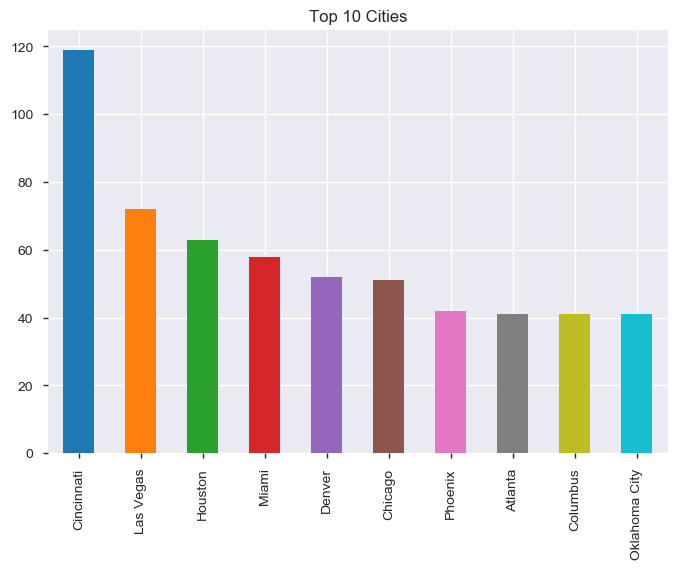

In [23]:
Restaurant_Data.city.value_counts()[:10].plot.bar(title="Top 10 Cities")

    Distribution of Restaurant across top 10 Provinces

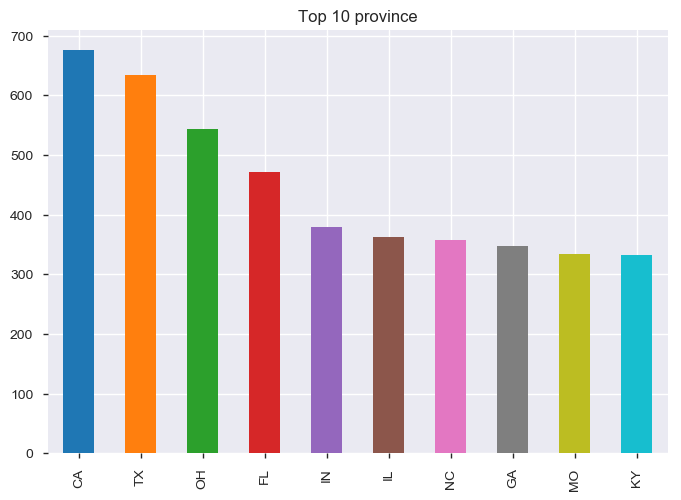

In [24]:
Restaurant_Data.province.value_counts()[:10].plot.bar(title="Top 10 province")

In [25]:
Provinces = Restaurant_Data[Restaurant_Data['province'].str.contains("CA|TX|OH|FL|IN|IL|NC|GA|MO|KY")]

In [26]:
Provinces.head()

,address,city,country,latitude,longitude,name,postalCode,province,CompleteAdress
1,530 Clinton Ave,Washington Court House,US,39.53255,-83.44526,wendys,43160,OH,wendys 530 Clinton Ave Washington Court House ...
2,408 Market Square Dr,Maysville,US,38.62736,-83.79141,frischs big boy,41056,KY,frischs big boy 408 Market Square Dr Maysville...
4,139 Columbus Rd,Athens,US,39.35155,-82.09728,omg rotisserie,45701,OH,omg rotisserie 139 Columbus Rd Athens OH 45701
5,4182 Tonya Trl,Hamilton,US,39.41760,-84.47641,dominos pizza,45011,OH,dominos pizza 4182 Tonya Trl Hamilton OH 45011
6,590 S Main St,Englewood,US,39.86969,-84.29358,dominos pizza,45322,OH,dominos pizza 590 S Main St Englewood OH 45322


In [27]:
scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]
data = [ go.Scattergeo
        (locationmode='USA-states',
         lon=Provinces['longitude'],
         lat=Provinces['latitude'],
         text=Provinces['CompleteAdress'],
         mode='markers',
         marker=dict( 
            size = 0.8, 
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle-dot',
            line = dict(
                width=1,
                color='rgb(102, 102, 102)'
            ),

            colorscale = scl,
            cmin = 0,
            color = Provinces['name'].count(),
            cmax = Provinces['name'].count().max(),
            colorbar=dict(
            title="Provinces Data"
            )
        ))]
layout = dict(
        title = 'Top 10 Provinces across US<br>(Hover for Restaurant details)', 
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 1,
            subunitwidth = 1    
           ),
    )
fig = go.Figure(data=data, layout=layout )
py.iplot(fig, filename='Top 10 Provinces Distribution' )           

## Top 10 Fast Food Restaurants?

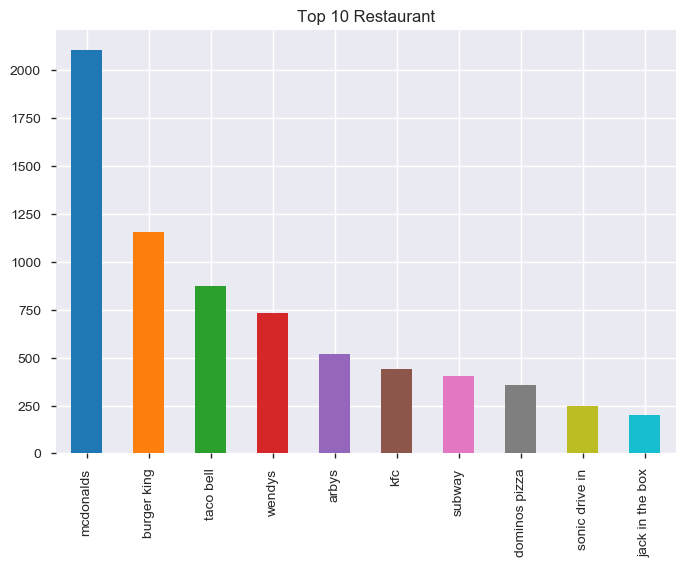

In [28]:
Restaurant_Data.name.value_counts()[:10].plot.bar(title="Top 10 Restaurant")

## Top 10 Fast Food Restaurant Contribution

In [29]:
Top10 = Restaurant_Data.name.value_counts()[:10]
Top10

mcdonalds          2105
burger king        1154
taco bell           873
wendys              734
arbys               520
kfc                 441
subway              404
dominos pizza       359
sonic drive in      248
jack in the box     201
Name: name, dtype: int64

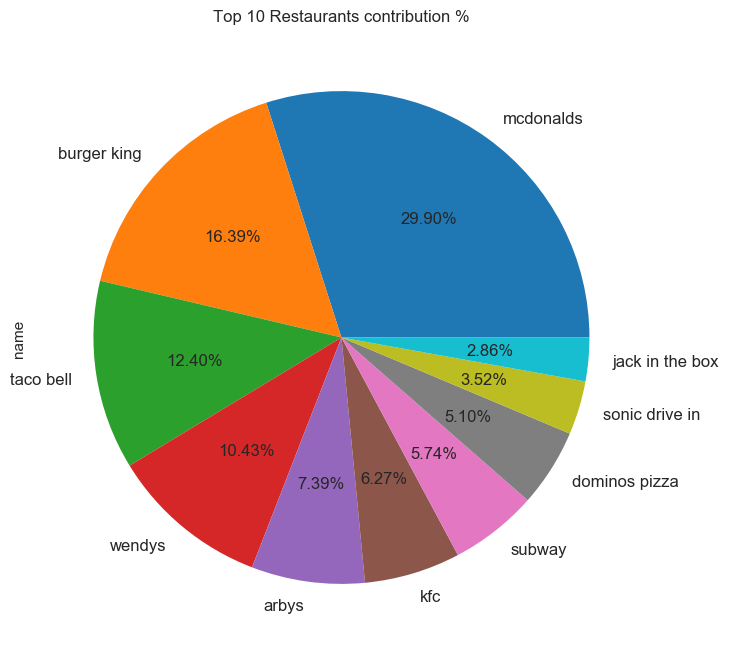

In [30]:
Restaurant_Data.name.value_counts()[:10].plot.pie(title= 'Top 10 Restaurants contribution %', figsize=(8,8), autopct='%.2f%%',fontsize=12);

## Top 10 Cities contributions?

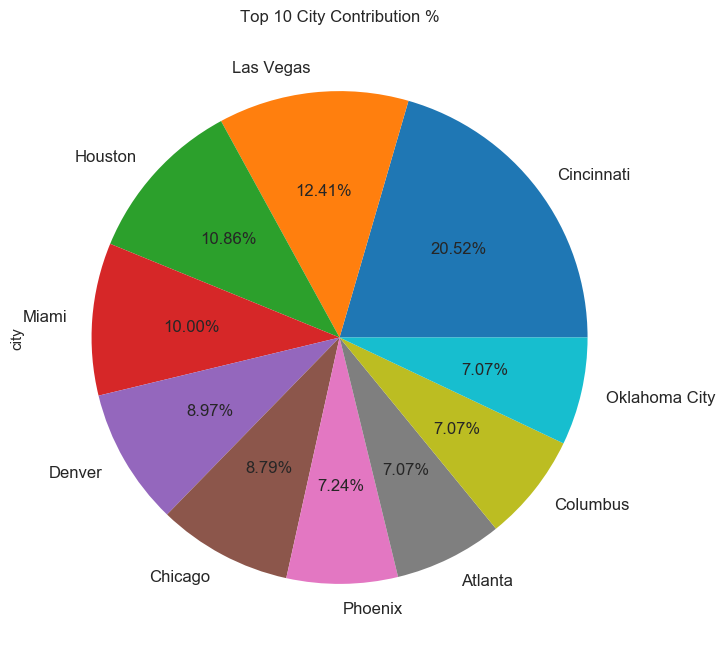

In [31]:
Restaurant_Data.city.value_counts()[:10].plot.pie(title= 'Top 10 City Contribution %', figsize=(8,8), autopct='%.2f%%',fontsize=12);

Creating Data Frame with top 10 Restaurant in order to show the distribution on US map.

In [32]:
Name = Restaurant_Data[Restaurant_Data['name'].str.contains("mcodnalds|arbys|subway|sonic drive in|wendys|dominos pizza|kfc|taco bell|jack in the box")]
Name.head()

,address,city,country,latitude,longitude,name,postalCode,province,CompleteAdress
1,530 Clinton Ave,Washington Court House,US,39.53255,-83.44526,wendys,43160,OH,wendys 530 Clinton Ave Washington Court House ...
5,4182 Tonya Trl,Hamilton,US,39.41760,-84.47641,dominos pizza,45011,OH,dominos pizza 4182 Tonya Trl Hamilton OH 45011
6,590 S Main St,Englewood,US,39.86969,-84.29358,dominos pizza,45322,OH,dominos pizza 590 S Main St Englewood OH 45322
8,205 W Church St,Batesburg,US,33.91335,-81.53330,wendys,29006,SC,wendys 205 W Church St Batesburg SC 29006
10,613 W Center St,Sheridan,US,34.30687,-92.40784,sonic drive in,72150,AR,sonic drive in 613 W Center St Sheridan AR 72150


# Distribution of Top 10 Fast Food Restaurant across US?

In [33]:
scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]
data = [ go.Scattergeo
        (locationmode='USA-states',
         lon=Name['longitude'],
         lat=Name['latitude'],
         text=Name['CompleteAdress'],
         mode='markers',
         marker=dict( 
            size = 0.8, 
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle-dot',
            line = dict(
                width=1,
                color='rgb(102, 102, 102)'
            ),

            colorscale = scl,
            cmin = 0,
            color = Name['name'].count(),
            cmax = Name['name'].count().max(),
            colorbar=dict(
            title="Restrutant Data"
            )
        ))]
layout = dict(
        title = 'Top 10 Resturant across US<br>(Hover for Restaurant details)', 
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 1,
            subunitwidth = 1    
           ),
    )
fig = go.Figure(data=data, layout=layout )
py.iplot(fig, filename='Top 10 Restaurant Distribution' )           

From above Distribution it is clear that even the top 10 Restaurant are distributed evenly in Easter US

Creating a DataFrame to see the distribution of Mcdonalds across US

In [34]:
Mcdonalds = Restaurant_Data[Restaurant_Data['name'].str.contains("mcdonalds")]
Mcdonalds.head()

,address,city,country,latitude,longitude,name,postalCode,province,CompleteAdress
0,324 Main St,Massena,US,44.92130,-74.890210,mcdonalds,13662,NY,mcdonalds 324 Main St Massena NY 13662
3,6098 State Highway 37,Massena,US,44.95008,-74.845530,mcdonalds,13662,NY,mcdonalds 6098 State Highway 37 Massena NY 13662
7,401 N Jennings St,Saluda,US,34.00598,-81.770400,mcdonalds,29138,SC,mcdonalds 401 N Jennings St Saluda SC 29138
12,1535 NW 50th St,Oklahoma City,US,35.52234,-97.538200,mcdonalds,73118,OK,mcdonalds 1535 NW 50th St Oklahoma City OK 73118
15,301 University Blvd,Louisville,US,38.21999,-85.764824,mcdonalds,40208,KY,mcdonalds 301 University Blvd Louisville KY 40208


In [35]:


scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]
data = [ go.Scattergeo
        (locationmode='USA-states',
         lon=Mcdonalds['longitude'],
         lat=Mcdonalds['latitude'],
         text=Mcdonalds['CompleteAdress'],
         mode='markers',
         marker=dict( 
            size = 0.8, 
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle-dot',
            line = dict(
                width=1,
                color='rgb(102, 102, 102)'
            ),

            colorscale = scl,
            cmin = 0,
            color = Mcdonalds['name'].count(),
            cmax = Mcdonalds['name'].count().max(),
            colorbar=dict(
            title="McDonald's Across US"
            )
        ))]
layout = dict(
        title = "McDonald's across US<br>(Hover for Restaurant details)", 
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 1,
            subunitwidth = 1    
           ),
    )
fig = go.Figure(data=data, layout=layout )
py.iplot(fig, filename='MCDonalds Across US' )           

Eatern US has highest Number of Mcdonalds 

## Showing the top 10 Restaurant distribution as per Cities

In [36]:
mcdonalds = Restaurant_Data.loc[Restaurant_Data['name'] == 'mcdonalds',:]
mcdonalds['mcd'] = 1 
mcdonalds.head()


C:\Users\Kuntol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,address,city,country,latitude,longitude,name,postalCode,province,CompleteAdress,mcd
0,324 Main St,Massena,US,44.92130,-74.890210,mcdonalds,13662,NY,mcdonalds 324 Main St Massena NY 13662,1
3,6098 State Highway 37,Massena,US,44.95008,-74.845530,mcdonalds,13662,NY,mcdonalds 6098 State Highway 37 Massena NY 13662,1
7,401 N Jennings St,Saluda,US,34.00598,-81.770400,mcdonalds,29138,SC,mcdonalds 401 N Jennings St Saluda SC 29138,1
12,1535 NW 50th St,Oklahoma City,US,35.52234,-97.538200,mcdonalds,73118,OK,mcdonalds 1535 NW 50th St Oklahoma City OK 73118,1
15,301 University Blvd,Louisville,US,38.21999,-85.764824,mcdonalds,40208,KY,mcdonalds 301 University Blvd Louisville KY 40208,1


In [37]:
mcdonalds['mcd'].count()

2105

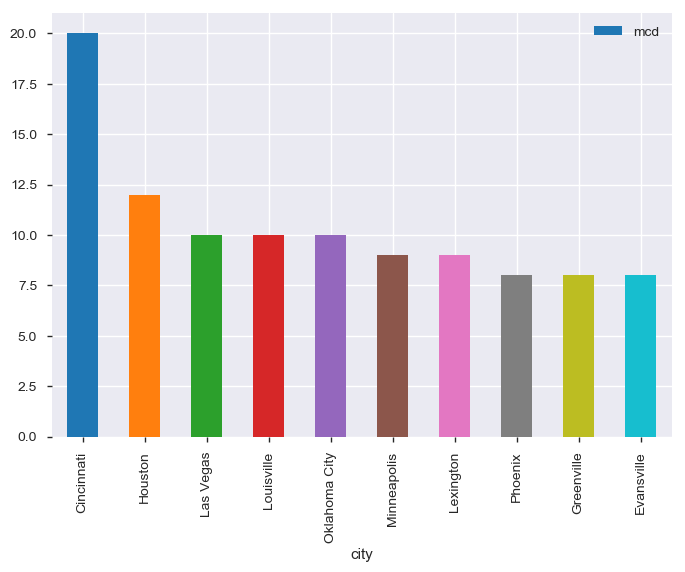

In [38]:
(mcdonalds.groupby('city')['mcd'].count()).sort_values(ascending = False)[:10].to_frame().reset_index(drop = False).plot('city','mcd',kind = 'bar')

In [39]:
BurgerKing = Restaurant_Data.loc[Restaurant_Data['name'] == 'burger king',:]
BurgerKing['bk'] = 1 
BurgerKing.head()

C:\Users\Kuntol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,address,city,country,latitude,longitude,name,postalCode,province,CompleteAdress,bk
40,982 Macon St,Warner Robins,US,32.594950,-83.583380,burger king,31098,GA,burger king 982 Macon St Warner Robins GA 31098,1
41,6060 San Mateo Blvd NE,Albuquerque,US,35.144456,-106.585927,burger king,87109,NM,burger king 6060 San Mateo Blvd NE Albuquerque...,1
46,18000 Bagley Rd,Cleveland,US,41.373042,-81.826072,burger king,44130,OH,burger king 18000 Bagley Rd Cleveland OH 44130,1
63,225 Grant Ave,Auburn,US,42.949870,-76.547220,burger king,13021,NY,burger king 225 Grant Ave Auburn NY 13021,1
75,Co-Op City,Bronx,US,40.869100,-73.824800,burger king,10475,NY,burger king Co-Op City Bronx NY 10475,1


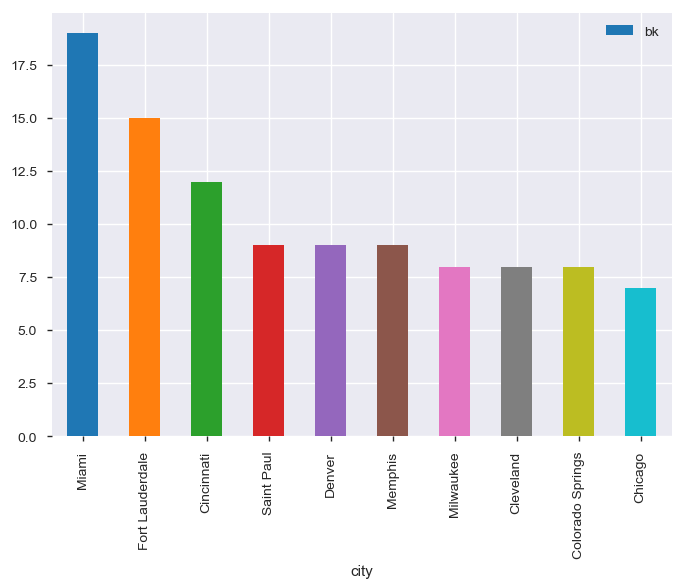

In [40]:
(BurgerKing.groupby('city')['bk'].count()).sort_values(ascending = False)[:10].to_frame().reset_index(drop = False).plot('city','bk',kind = 'bar')

In [41]:
tacobell = Restaurant_Data.loc[Restaurant_Data['name'] == 'taco bell',:]
tacobell['TC'] = 1 
tacobell.head()

C:\Users\Kuntol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,address,city,country,latitude,longitude,name,postalCode,province,CompleteAdress,TC
17,101 Thomas Garst Ln,Leland,US,34.233890,-77.995440,taco bell,28451,NC,taco bell 101 Thomas Garst Ln Leland NC 28451,1
30,105 Business Loop W,Jamestown,US,46.898997,-98.707788,taco bell,58401,ND,taco bell 105 Business Loop W Jamestown ND 58401,1
56,100 Northside Dr,Bennington,US,42.894130,-73.203160,taco bell,5201,VT,taco bell 100 Northside Dr Bennington VT 5201,1
67,344 S Service Rd E,Sullivan,US,38.223030,-91.156960,taco bell,63080,MO,taco bell 344 S Service Rd E Sullivan MO 63080,1
69,2124 S 1st St,Yakima,US,46.571440,-120.488250,taco bell,98903,WA,taco bell 2124 S 1st St Yakima WA 98903,1


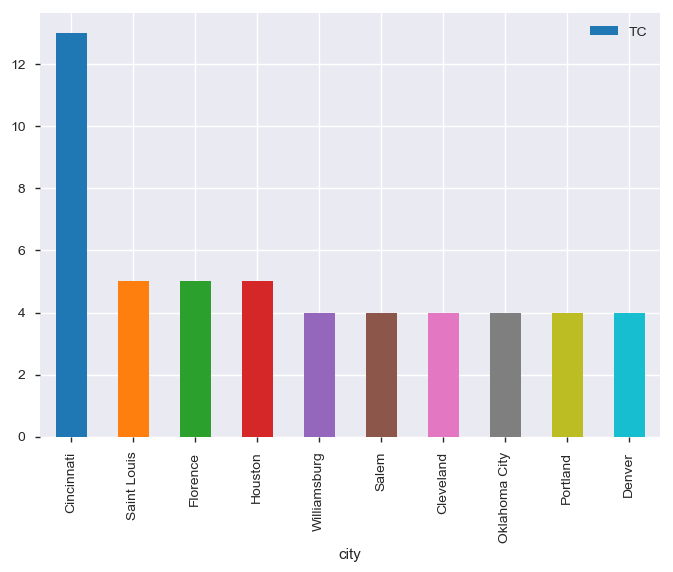

In [42]:
(tacobell.groupby('city')['TC'].count()).sort_values(ascending = False)[:10].to_frame().reset_index(drop = False).plot('city','TC',kind = 'bar')

In [43]:
Wendys = Restaurant_Data.loc[Restaurant_Data['name'] == 'wendys',:]
Wendys['WD'] = 1 
Wendys.head()

C:\Users\Kuntol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,address,city,country,latitude,longitude,name,postalCode,province,CompleteAdress,WD
1,530 Clinton Ave,Washington Court House,US,39.532550,-83.445260,wendys,43160,OH,wendys 530 Clinton Ave Washington Court House ...,1
8,205 W Church St,Batesburg,US,33.913350,-81.533300,wendys,29006,SC,wendys 205 W Church St Batesburg SC 29006,1
128,1231 Holcomb Blvd,Camp Lejeune,US,34.724180,-77.344440,wendys,28547,NC,wendys 1231 Holcomb Blvd Camp Lejeune NC 28547,1
217,313 2nd St,North Wilkesboro,US,36.165620,-81.136580,wendys,28659,NC,wendys 313 2nd St North Wilkesboro NC 28659,1
245,14493 Gideon Dr,Woodbridge,US,38.637623,-77.297706,wendys,22192,VA,wendys 14493 Gideon Dr Woodbridge VA 22192,1


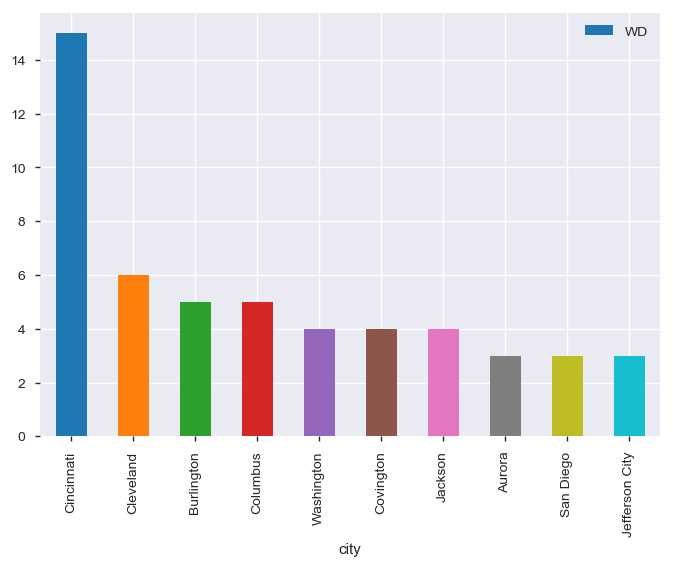

In [44]:
(Wendys.groupby('city')['WD'].count()).sort_values(ascending = False)[:10].to_frame().reset_index(drop = False).plot('city','WD',kind = 'bar')

In [45]:
Arbys = Restaurant_Data.loc[Restaurant_Data['name'] == 'arbys',:]
Arbys['AB'] = 1 
Arbys.head()

C:\Users\Kuntol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,address,city,country,latitude,longitude,name,postalCode,province,CompleteAdress,AB
136,2001 Sutton Ln,Sutton,US,38.700840,-80.664158,arbys,26601,WV,arbys 2001 Sutton Ln Sutton WV 26601,1
156,324 W Bypass,Andalusia,US,31.307890,-86.499900,arbys,36420,AL,arbys 324 W Bypass Andalusia AL 36420,1
246,2815 Fern Valley Rd,Louisville,US,38.157500,-85.711200,arbys,40213,KY,arbys 2815 Fern Valley Rd Louisville KY 40213,1
249,713 McCroskey St,Nixa,US,37.053586,-93.302767,arbys,65714,MO,arbys 713 McCroskey St Nixa MO 65714,1
272,501 S 8th St,Rogers,US,36.329530,-94.125430,arbys,72756,AR,arbys 501 S 8th St Rogers AR 72756,1


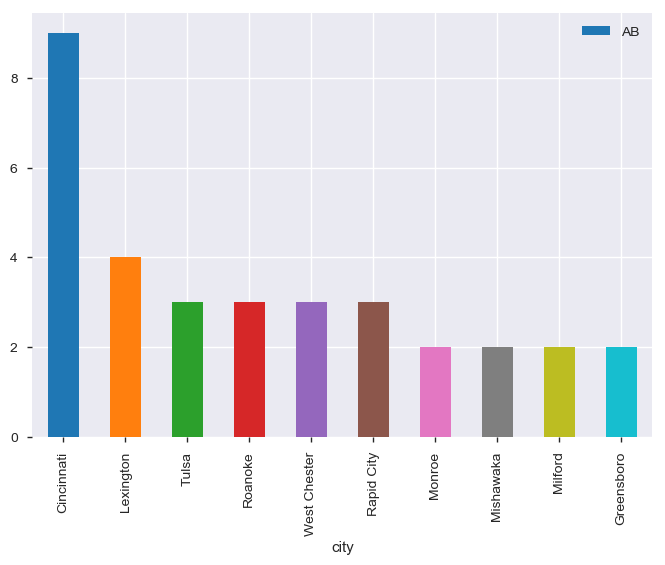

In [46]:
(Arbys.groupby('city')['AB'].count()).sort_values(ascending = False)[:10].to_frame().reset_index(drop = False).plot('city','AB',kind = 'bar')

In [47]:
KFC= Restaurant_Data.loc[Restaurant_Data['name'] == 'kfc',:]
KFC['KFC'] = 1 
KFC.head()

C:\Users\Kuntol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,address,city,country,latitude,longitude,name,postalCode,province,CompleteAdress,KFC
331,302 S Main St,Swainsboro,US,32.593100,-82.33140,kfc,30401,GA,kfc 302 S Main St Swainsboro GA 30401,1
345,613 Flindt Dr,Storm Lake,US,42.645300,-95.18810,kfc,50588,IA,kfc 613 Flindt Dr Storm Lake IA 50588,1
372,510 N Webster St,Taylorville,US,39.554200,-89.29700,kfc,62568,IL,kfc 510 N Webster St Taylorville IL 62568,1
380,104 Village Rd NE,Leland,US,34.233900,-77.99600,kfc,28451,NC,kfc 104 Village Rd NE Leland NC 28451,1
397,568 N 2nd E,Rexburg,US,43.835842,-111.77808,kfc,83440,ID,kfc 568 N 2nd E Rexburg ID 83440,1


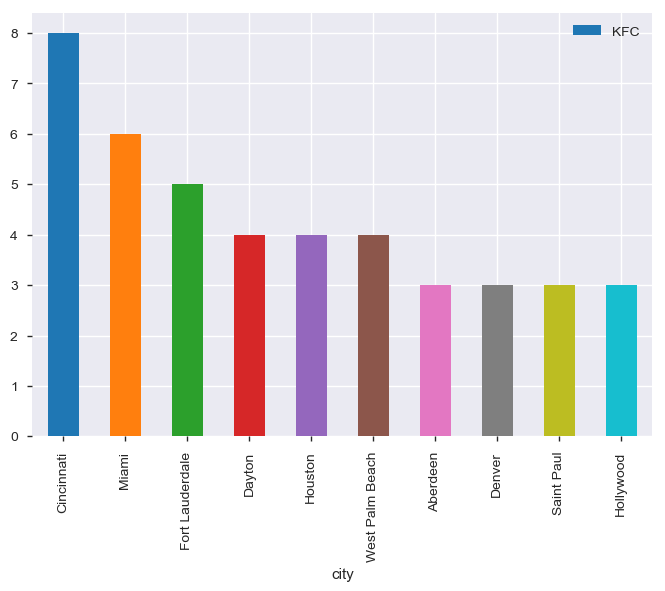

In [48]:
(KFC.groupby('city')['KFC'].count()).sort_values(ascending = False)[:10].to_frame().reset_index(drop = False).plot('city','KFC',kind = 'bar')

In [49]:
SUBWAY= Restaurant_Data.loc[Restaurant_Data['name'] == 'subway',:]
SUBWAY['SBW'] = 1 
SUBWAY.head()

C:\Users\Kuntol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,address,city,country,latitude,longitude,name,postalCode,province,CompleteAdress,SBW
80,875 W 1150 S,Brigham City,US,41.48561,-112.02934,subway,84302,UT,subway 875 W 1150 S Brigham City UT 84302,1
161,2 N Mineral St,Keyser,US,39.44023,-78.97744,subway,26726,WV,subway 2 N Mineral St Keyser WV 26726,1
206,207 N Broadway St,Checotah,US,35.47132,-95.52156,subway,74426,OK,subway 207 N Broadway St Checotah OK 74426,1
210,5704 Jackson St,Alexandria,US,31.26788,-92.48741,subway,71303,LA,subway 5704 Jackson St Alexandria LA 71303,1
214,580 Shelburne Rd Ste 11,Burlington,US,44.44926,-73.20896,subway,5401,VT,subway 580 Shelburne Rd Ste 11 Burlington VT 5401,1


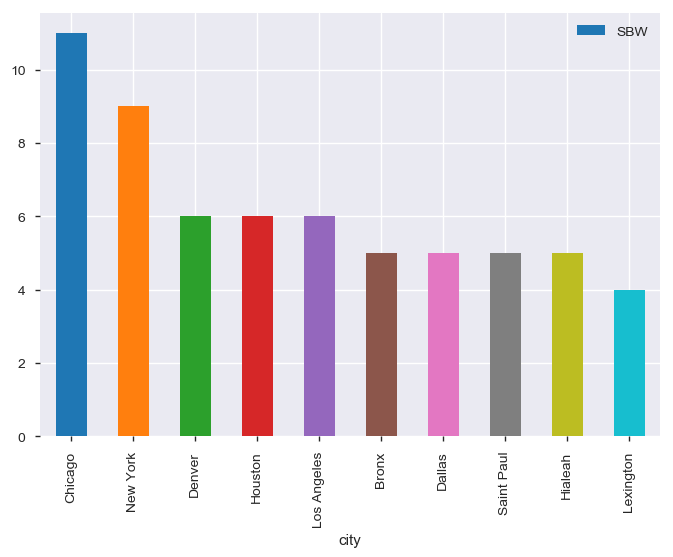

In [50]:
(SUBWAY.groupby('city')['SBW'].count()).sort_values(ascending = False)[:10].to_frame().reset_index(drop = False).plot('city','SBW',kind = 'bar')

In [51]:
Dominos= Restaurant_Data.loc[Restaurant_Data['name'] == 'dominos pizza',:]
Dominos['Dominos'] = 1 
Dominos.head()

C:\Users\Kuntol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,address,city,country,latitude,longitude,name,postalCode,province,CompleteAdress,Dominos
5,4182 Tonya Trl,Hamilton,US,39.41760,-84.47641,dominos pizza,45011,OH,dominos pizza 4182 Tonya Trl Hamilton OH 45011,1
6,590 S Main St,Englewood,US,39.86969,-84.29358,dominos pizza,45322,OH,dominos pizza 590 S Main St Englewood OH 45322,1
11,512 Highway 425 S Lot B,Monticello,US,33.61937,-91.80232,dominos pizza,71655,AR,dominos pizza 512 Highway 425 S Lot B Monticel...,1
13,125 Towne Center Dr,Lexington,US,38.06753,-84.53043,dominos pizza,40511,KY,dominos pizza 125 Towne Center Dr Lexington KY...,1
27,301 S Lynn Riggs Blvd,Claremore,US,36.31069,-95.61759,dominos pizza,74017,OK,dominos pizza 301 S Lynn Riggs Blvd Claremore ...,1


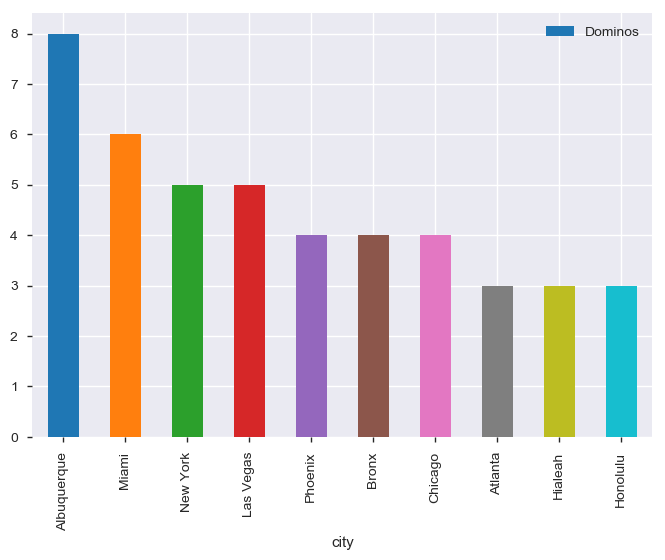

In [52]:
(Dominos.groupby('city')['Dominos'].count()).sort_values(ascending = False)[:10].to_frame().reset_index(drop = False).plot('city','Dominos',kind = 'bar')

In [53]:
Sonic= Restaurant_Data.loc[Restaurant_Data['name'] == 'sonic drive in',:]
Sonic['Sonic'] = 1 
Sonic.head()

C:\Users\Kuntol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,address,city,country,latitude,longitude,name,postalCode,province,CompleteAdress,Sonic
10,613 W Center St,Sheridan,US,34.30687,-92.40784,sonic drive in,72150,AR,sonic drive in 613 W Center St Sheridan AR 72150,1
29,3211 S 4th St,Leavenworth,US,39.28532,-94.90441,sonic drive in,66048,KS,sonic drive in 3211 S 4th St Leavenworth KS 66048,1
38,3208 S Elm Pl,Broken Arrow,US,36.01948,-95.79756,sonic drive in,74012,OK,sonic drive in 3208 S Elm Pl Broken Arrow OK 7...,1
43,450 N Harrison Ave,Shawnee,US,35.33252,-96.91222,sonic drive in,74801,OK,sonic drive in 450 N Harrison Ave Shawnee OK 7...,1
66,111 Commons Dr,Maumelle,US,34.84808,-92.40624,sonic drive in,72113,AR,sonic drive in 111 Commons Dr Maumelle AR 72113,1


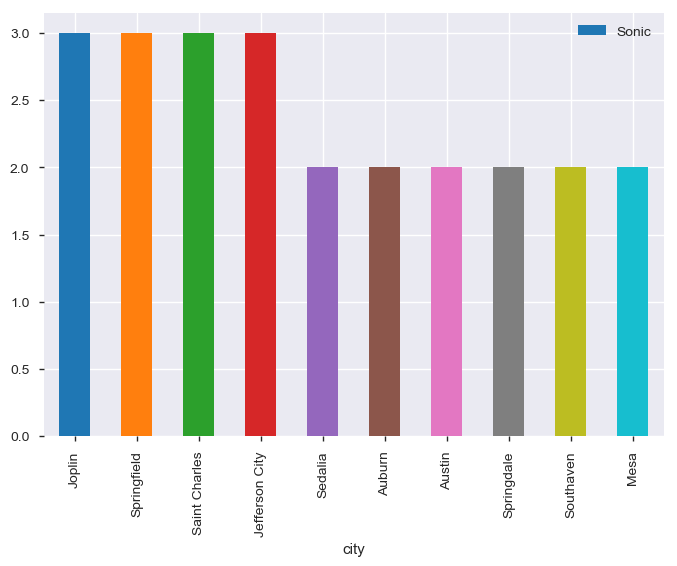

In [54]:
(Sonic.groupby('city')['Sonic'].count()).sort_values(ascending = False)[:10].to_frame().reset_index(drop = False).plot('city','Sonic',kind = 'bar')

In [55]:
Jack= Restaurant_Data.loc[Restaurant_Data['name'] == 'jack in the box',:]
Jack['Jack'] = 1 
Jack.head()

C:\Users\Kuntol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,address,city,country,latitude,longitude,name,postalCode,province,CompleteAdress,Jack
77,1865 Blankenship Rd,West Linn,US,45.349698,-122.653281,jack in the box,97068,OR,jack in the box 1865 Blankenship Rd West Linn ...,1
149,839 E Mulberry St,Angleton,US,29.165887,-95.422475,jack in the box,77515,TX,jack in the box 839 E Mulberry St Angleton TX ...,1
238,2333 Missouri Blvd,Jefferson City,US,38.581340,-92.213980,jack in the box,65109,MO,jack in the box 2333 Missouri Blvd Jefferson C...,1
256,208 E Highway 90,Dayton,US,30.046579,-94.886769,jack in the box,77535,TX,jack in the box 208 E Highway 90 Dayton TX 77535,1
356,3100 Foothills Ave,Mountain Home,US,43.141580,-115.662510,jack in the box,83647,ID,jack in the box 3100 Foothills Ave Mountain Ho...,1


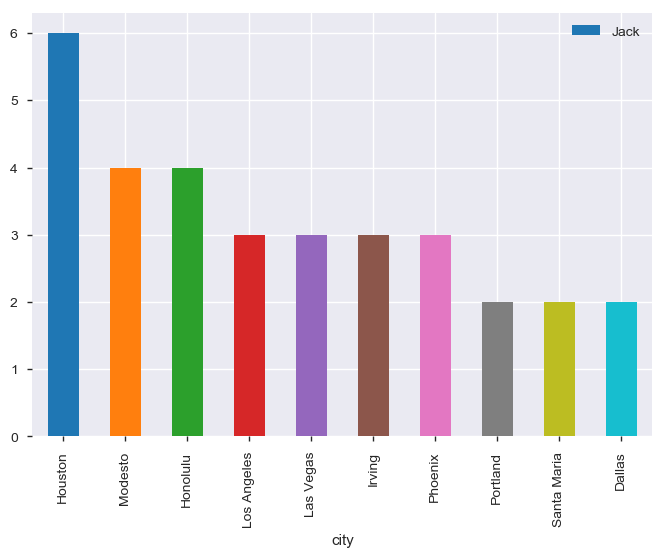

In [56]:
(Jack.groupby('city')['Jack'].count()).sort_values(ascending = False)[:10].to_frame().reset_index(drop = False).plot('city','Jack',kind = 'bar')

## Restaurant in Top 10 Cities

In [57]:
Cincinnati= Restaurant_Data.loc[Restaurant_Data['city'] == 'Cincinnati',:]
Cincinnati['Cincinnati'] = 1 
Cincinnati.head()

C:\Users\Kuntol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,address,city,country,latitude,longitude,name,postalCode,province,CompleteAdress,Cincinnati
101,3515 Springdale Rd,Cincinnati,US,39.25009,-84.59411,dominos pizza,45251,OH,dominos pizza 3515 Springdale Rd Cincinnati OH...,1
102,7720 Laurel Ave,Cincinnati,US,39.18985,-84.36207,dominos pizza,45243,OH,dominos pizza 7720 Laurel Ave Cincinnati OH 45243,1
813,11575 Springfield Pike,Cincinnati,US,39.28630,-84.48560,white castle,45246,OH,white castle 11575 Springfield Pike Cincinnati...,1
814,400 Northland Blvd,Cincinnati,US,39.28241,-84.48590,wendys,45240,OH,wendys 400 Northland Blvd Cincinnati OH 45240,1
815,11960 Lebanon Rd,Cincinnati,US,39.29191,-84.39403,wendys,45241,OH,wendys 11960 Lebanon Rd Cincinnati OH 45241,1


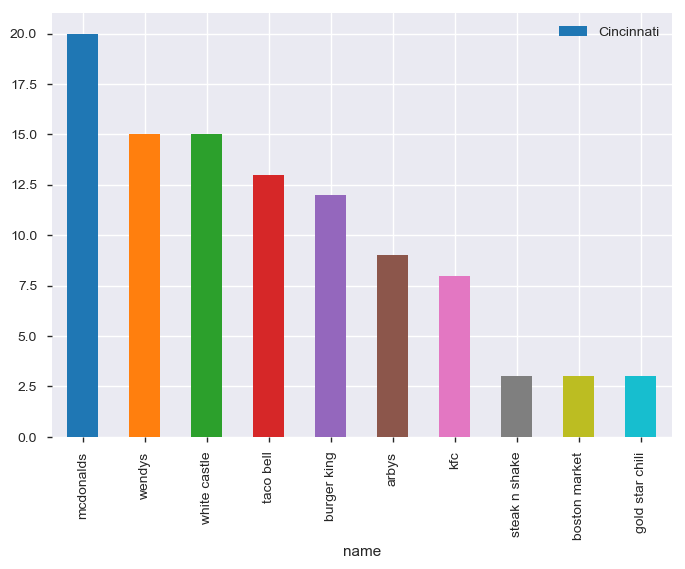

In [58]:
(Cincinnati.groupby('name')['Cincinnati'].count()).sort_values(ascending = False)[:10].to_frame().reset_index(drop = False).plot('name','Cincinnati',kind = 'bar')

In [59]:
Vegas= Restaurant_Data.loc[Restaurant_Data['city'] == 'Las Vegas',:]
Vegas['Las Vegas'] = 1 
Vegas.head()

C:\Users\Kuntol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,address,city,country,latitude,longitude,name,postalCode,province,CompleteAdress,Las Vegas
183,1501 7th St,Las Vegas,US,35.60569,-105.22363,mcdonalds,87701,NM,mcdonalds 1501 7th St Las Vegas NM 87701,1
1327,6375 S Pecos Rd,Las Vegas,US,36.07401,-115.10158,dominos pizza,89120,NV,dominos pizza 6375 S Pecos Rd Las Vegas NV 89120,1
2481,8050 Dean Martin Drive,Las Vegas,US,36.04340,-115.18720,taco time,89139,NV,taco time 8050 Dean Martin Drive Las Vegas NV ...,1
3375,4604 W Sahara Ave Ste 1,Las Vegas,US,36.14490,-115.20480,dominos pizza,89102,NV,dominos pizza 4604 W Sahara Ave Ste 1 Las Vega...,1
4020,1335 Grand Ave,Las Vegas,US,35.60610,-105.21133,burger king,87701,NM,burger king 1335 Grand Ave Las Vegas NM 87701,1


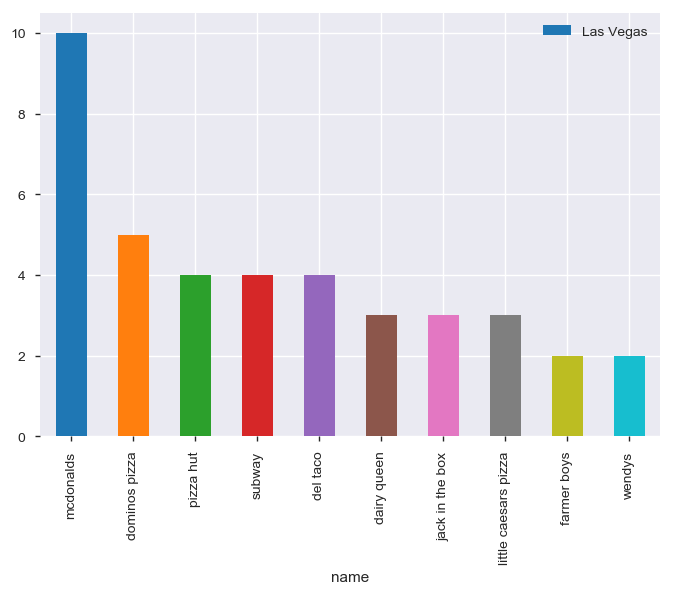

In [60]:
(Vegas.groupby('name')['Las Vegas'].count()).sort_values(ascending = False)[:10].to_frame().reset_index(drop = False).plot('name','Las Vegas',kind = 'bar')

In [61]:
Houston= Restaurant_Data.loc[Restaurant_Data['city'] == 'Houston',:]
Houston['Houston'] = 1 
Houston.head()

C:\Users\Kuntol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,address,city,country,latitude,longitude,name,postalCode,province,CompleteAdress,Houston
564,17234 Northwest Fwy,Houston,US,29.888506,-95.581290,whataburger,77040,TX,whataburger 17234 Northwest Fwy Houston TX 77040,1
1271,8940 W Sam Houston Pky,Houston,US,29.901300,-95.551800,mcdonalds,77040,TX,mcdonalds 8940 W Sam Houston Pky Houston TX 77040,1
1506,12649 Memorial Dr,Houston,US,29.766900,-95.557600,dominos pizza,77024,TX,dominos pizza 12649 Memorial Dr Houston TX 77024,1
1507,2902 N Shepherd Dr,Houston,US,29.813530,-95.410320,five guys,77008,TX,five guys 2902 N Shepherd Dr Houston TX 77008,1
1508,13270 Northwest Fwy,Houston,US,29.848671,-95.503555,whataburger,77040,TX,whataburger 13270 Northwest Fwy Houston TX 77040,1


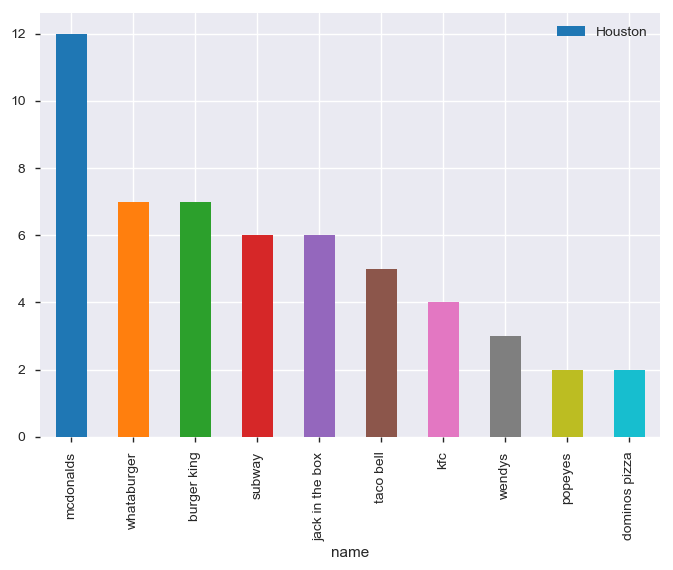

In [62]:
(Houston.groupby('name')['Houston'].count()).sort_values(ascending = False)[:10].to_frame().reset_index(drop = False).plot('name','Houston',kind = 'bar')

In [63]:
Miami= Restaurant_Data.loc[Restaurant_Data['city'] == 'Miami',:]
Miami['Miami'] = 1 
Miami.head()

C:\Users\Kuntol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,address,city,country,latitude,longitude,name,postalCode,province,CompleteAdress,Miami
24,1131n N Main St,Miami,US,36.888260,-94.877660,mcdonalds,74354,OK,mcdonalds 1131n N Main St Miami OK 74354,1
281,18710 S Dixie Hwy,Miami,US,25.594612,-80.356141,pollo tropical,33157,FL,pollo tropical 18710 S Dixie Hwy Miami FL 33157,1
2272,1699 Ne 123rd St,Miami,US,25.889500,-80.164800,flip burger bar,33181,FL,flip burger bar 1699 Ne 123rd St Miami FL 33181,1
3083,7390 Coral Way,Miami,US,25.747346,-80.314871,burger king,33155,FL,burger king 7390 Coral Way Miami FL 33155,1
3979,20505 Old Cutler Rd,Miami,US,25.576898,-80.338895,burger king,33189,FL,burger king 20505 Old Cutler Rd Miami FL 33189,1


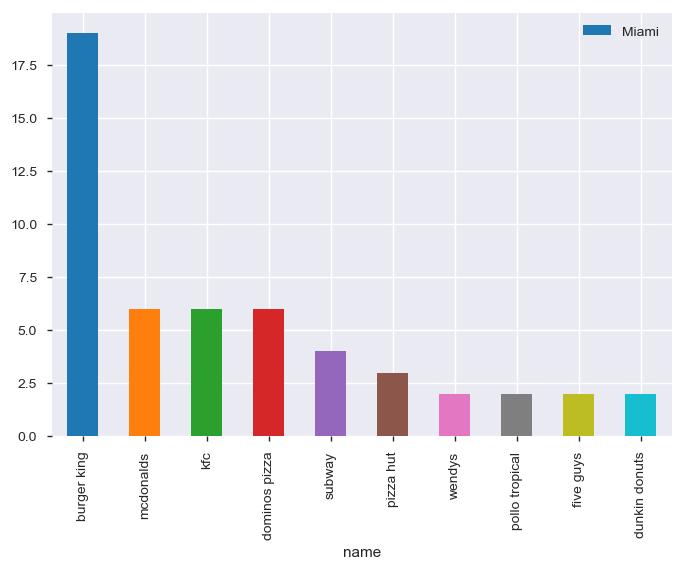

In [64]:
(Miami.groupby('name')['Miami'].count()).sort_values(ascending = False)[:10].to_frame().reset_index(drop = False).plot('name','Miami',kind = 'bar')

In [65]:
Denver= Restaurant_Data.loc[Restaurant_Data['city'] == 'Denver',:]
Denver['Denver'] = 1 
Denver.head()

C:\Users\Kuntol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,address,city,country,latitude,longitude,name,postalCode,province,CompleteAdress,Denver
965,1400 E 104th Ave,Denver,US,39.88302,-104.96881,little caesars pizza,80233,CO,little caesars pizza 1400 E 104th Ave Denver C...,1
974,9592 Federal Blvd,Denver,US,39.87060,-105.02500,dominos pizza,80260,CO,dominos pizza 9592 Federal Blvd Denver CO 80260,1
1893,4875 Federal Blvd,Denver,US,39.78530,-105.02570,burger king,80221,CO,burger king 4875 Federal Blvd Denver CO 80221,1
2404,7150 Leetsdale Dr Unit H,Denver,US,39.69838,-104.90427,burger king,80224,CO,burger king 7150 Leetsdale Dr Unit H Denver CO...,1
2863,7355 W Colfax Ave #102,Denver,US,39.74060,-105.07840,jimmy johns,80214,CO,jimmy johns 7355 W Colfax Ave #102 Denver CO 8...,1


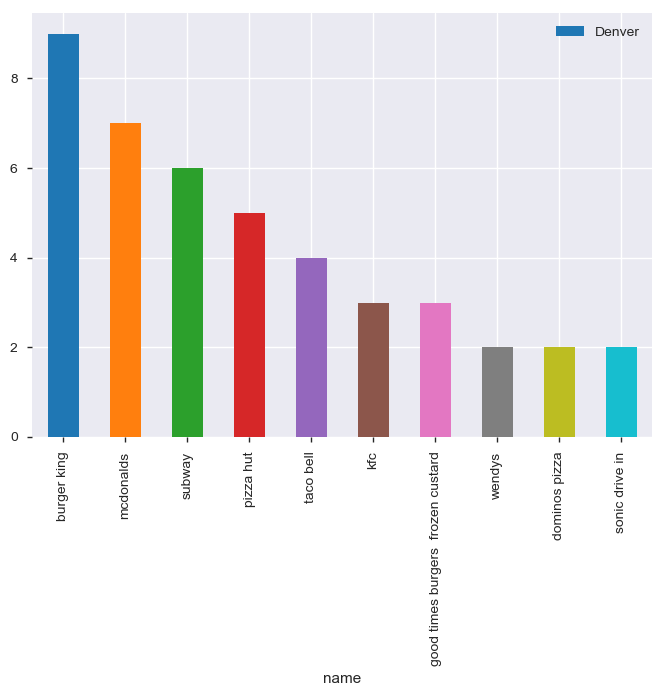

In [66]:
(Denver.groupby('name')['Denver'].count()).sort_values(ascending = False)[:10].to_frame().reset_index(drop = False).plot('name','Denver',kind = 'bar')

In [67]:
Phoenix= Restaurant_Data.loc[Restaurant_Data['city'] == 'Phoenix',:]
Phoenix['Phoenix'] = 1 
Phoenix.head()

C:\Users\Kuntol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,address,city,country,latitude,longitude,name,postalCode,province,CompleteAdress,Phoenix
155,3039 W Peoria Ave,Phoenix,US,33.581838,-112.124385,samurai sams,85029,AZ,samurai sams 3039 W Peoria Ave Phoenix AZ 85029,1
4730,702 W Camelback Rd,Phoenix,US,33.509980,-112.083540,papa johns pizza,85013,AZ,papa johns pizza 702 W Camelback Rd Phoenix AZ...,1
4752,4041 E Thomas Rd #124,Phoenix,US,33.479735,-111.994978,marias fry bread mexican food,85018,AZ,marias fry bread mexican food 4041 E Thomas R...,1
4755,7710 W Lower Buckeye Rd Ste 110,Phoenix,US,33.423364,-112.226012,dominos pizza,85043,AZ,dominos pizza 7710 W Lower Buckeye Rd Ste 110 ...,1
4762,6650 W Thomas Rd,Phoenix,US,33.480785,-112.202880,dominos pizza,85033,AZ,dominos pizza 6650 W Thomas Rd Phoenix AZ 85033,1


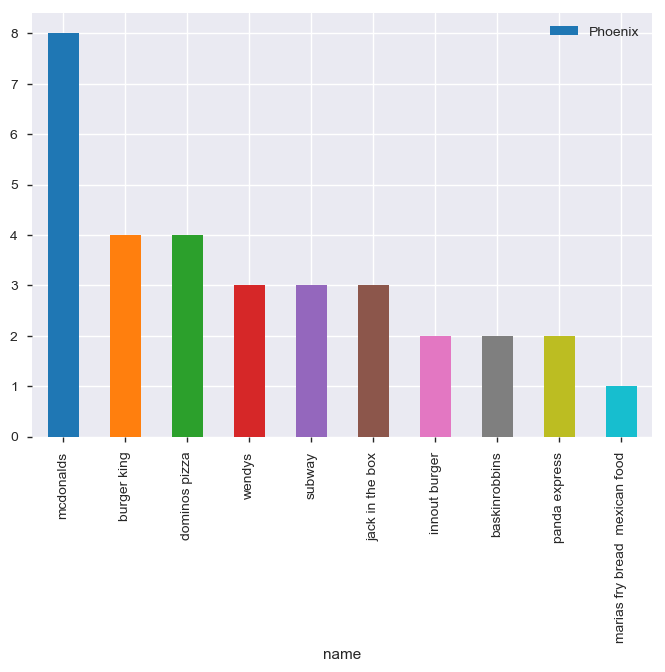

In [68]:
(Phoenix.groupby('name')['Phoenix'].count()).sort_values(ascending = False)[:10].to_frame().reset_index(drop = False).plot('name','Phoenix',kind = 'bar')

In [69]:
Chicago= Restaurant_Data.loc[Restaurant_Data['city'] == 'Chicago',:]
Chicago['Chicago'] = 1 
Chicago.head()

C:\Users\Kuntol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,address,city,country,latitude,longitude,name,postalCode,province,CompleteAdress,Chicago
2799,860 N Orleans St,Chicago,US,41.898380,-87.637530,big littles restaurant,60610,IL,big littles restaurant 860 N Orleans St Chica...,1
3041,4804 N Sheridan Rd,Chicago,US,41.969430,-87.654971,kfc,60640,IL,kfc 4804 N Sheridan Rd Chicago IL 60640,1
4612,6350 S Cicero Ave,Chicago,US,41.776790,-87.742600,burger king,60638,IL,burger king 6350 S Cicero Ave Chicago IL 60638,1
4739,300 N Michigan Ave,Chicago,US,41.887060,-87.624540,subway,60601,IL,subway 300 N Michigan Ave Chicago IL 60601,1
4743,23 S Clark St,Chicago,US,41.881306,-87.630848,mcdonalds,60603,IL,mcdonalds 23 S Clark St Chicago IL 60603,1


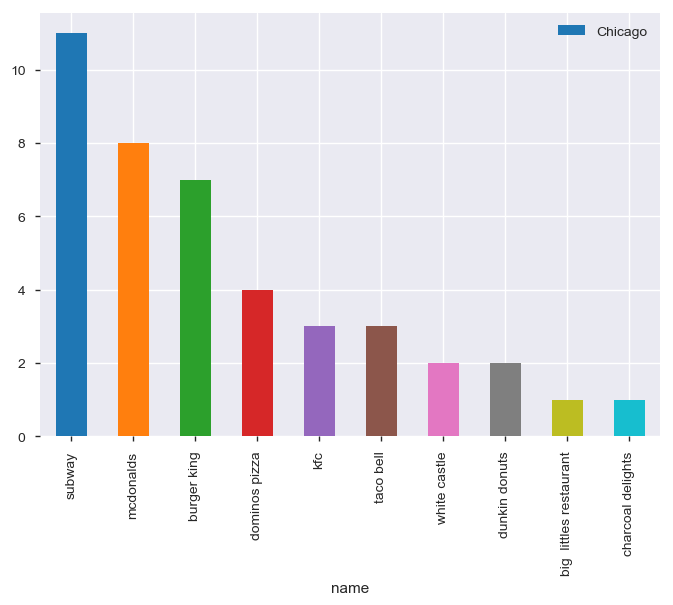

In [70]:
(Chicago.groupby('name')['Chicago'].count()).sort_values(ascending = False)[:10].to_frame().reset_index(drop = False).plot('name','Chicago',kind = 'bar')

In [71]:
Atlanta= Restaurant_Data.loc[Restaurant_Data['city'] == 'Atlanta',:]
Atlanta['Atlanta'] = 1 
Atlanta.head()

C:\Users\Kuntol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,address,city,country,latitude,longitude,name,postalCode,province,CompleteAdress,Atlanta
1259,8550 Roswell Road,Atlanta,US,33.987239,-84.351395,bojangles famous chicken n biscuits,30350,GA,bojangles famous chicken n biscuits 8550 Roswe...,1
1876,601 Loop 59,Atlanta,US,33.126300,-94.178600,kfc,75551,TX,kfc 601 Loop 59 Atlanta TX 75551,1
2357,222 Hammond Dr,Atlanta,US,33.919400,-84.379800,burger king,30328,GA,burger king 222 Hammond Dr Atlanta GA 30328,1
2859,1 Cnn Center,Atlanta,US,33.757900,-84.394300,arbys,30303,GA,arbys 1 Cnn Center Atlanta GA 30303,1
2932,4537 Chamblee Dunwoody Rd,Atlanta,US,33.923720,-84.314050,burger king,30338,GA,burger king 4537 Chamblee Dunwoody Rd Atlanta ...,1


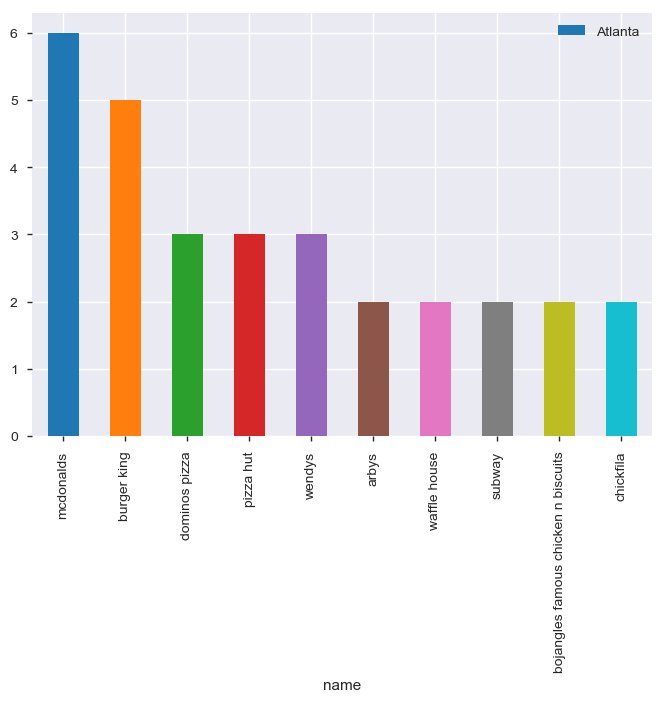

In [72]:
(Atlanta.groupby('name')['Atlanta'].count()).sort_values(ascending = False)[:10].to_frame().reset_index(drop = False).plot('name','Atlanta',kind = 'bar')

In [73]:
Columbus= Restaurant_Data.loc[Restaurant_Data['city'] == 'Columbus',:]
Columbus['Columbus'] = 1 
Columbus.head()

C:\Users\Kuntol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,address,city,country,latitude,longitude,name,postalCode,province,CompleteAdress,Columbus
501,1250 N National Rd,Columbus,US,39.210910,-85.878850,chickfila,47201,IN,chickfila 1250 N National Rd Columbus IN 47201,1
1116,613 N East Ave,Columbus,US,37.177140,-94.832150,subway,66725,KS,subway 613 N East Ave Columbus KS 66725,1
1263,1212 Manchester Expy,Columbus,US,32.506759,-84.975187,captain ds,31904,GA,captain ds 1212 Manchester Expy Columbus GA 31904,1
1529,2005 E 25 St,Columbus,US,39.222758,-85.902679,arbys,47201,IN,arbys 2005 E 25 St Columbus IN 47201,1
1727,901 N Wilson Rd,Columbus,US,39.972307,-83.099081,mcdonalds,43204,OH,mcdonalds 901 N Wilson Rd Columbus OH 43204,1


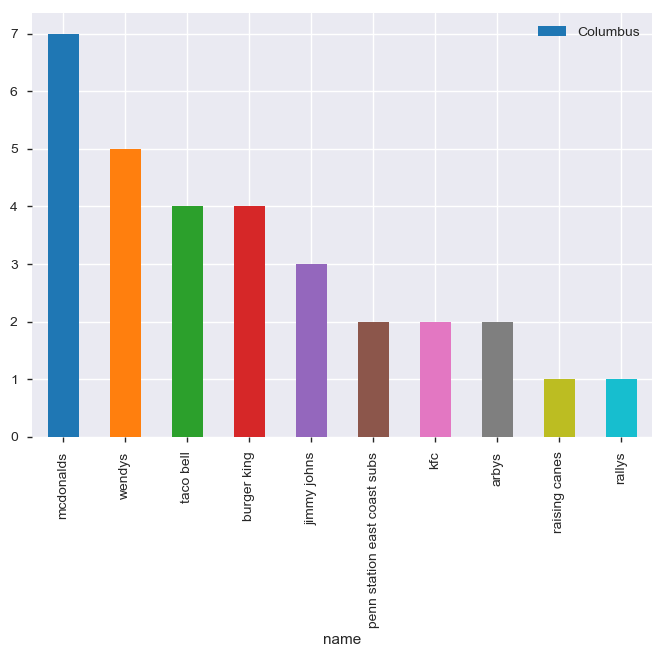

In [74]:
(Columbus.groupby('name')['Columbus'].count()).sort_values(ascending = False)[:10].to_frame().reset_index(drop = False).plot('name','Columbus',kind = 'bar')

In [75]:
OklahomaCity= Restaurant_Data.loc[Restaurant_Data['city'] == 'Oklahoma City',:]
OklahomaCity['OklahomaCity'] = 1 
OklahomaCity.head()

C:\Users\Kuntol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,address,city,country,latitude,longitude,name,postalCode,province,CompleteAdress,OklahomaCity
12,1535 NW 50th St,Oklahoma City,US,35.52234,-97.53820,mcdonalds,73118,OK,mcdonalds 1535 NW 50th St Oklahoma City OK 73118,1
16,5812 NW Expressway,Oklahoma City,US,35.54815,-97.61717,mcdonalds,73132,OK,mcdonalds 5812 NW Expressway Oklahoma City OK ...,1
49,819 SW 19th St,Oklahoma City,US,35.32026,-97.50536,dominos pizza,73160,OK,dominos pizza 819 SW 19th St Oklahoma City OK ...,1
536,5900 NW Expressway,Oklahoma City,US,35.54911,-97.61955,arbys,73132,OK,arbys 5900 NW Expressway Oklahoma City OK 73132,1
537,5590 NW Expressway,Oklahoma City,US,35.54601,-97.61229,churchs chicken,73132,OK,churchs chicken 5590 NW Expressway Oklahoma Ci...,1


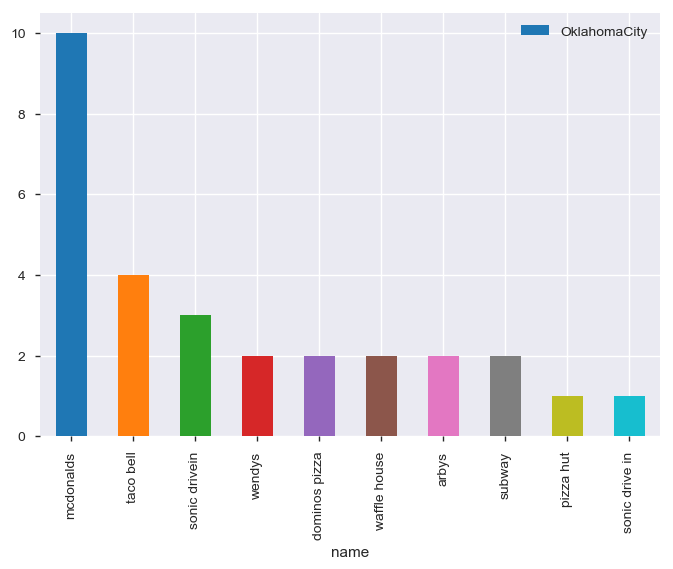

In [76]:
(OklahomaCity.groupby('name')['OklahomaCity'].count()).sort_values(ascending = False)[:10].to_frame().reset_index(drop = False).plot('name','OklahomaCity',kind = 'bar')

Let see the Distribution of other restaurants by creating a new dataframe of other remaining restaurant.

Creating Dataframe to store the data of other restaurants.

## Distribution of other Restaurants across US?

In [77]:
OthersRestaurant = Restaurant_Data[~Restaurant_Data['name'].str.contains("mcdonalds|burger king|arbys|kfc|subway|dominos pizza|taco bell|jack in the box|sonic|wendys")]
OthersRestaurant.head()

,address,city,country,latitude,longitude,name,postalCode,province,CompleteAdress
2,408 Market Square Dr,Maysville,US,38.627360,-83.791410,frischs big boy,41056,KY,frischs big boy 408 Market Square Dr Maysville...
4,139 Columbus Rd,Athens,US,39.351550,-82.097280,omg rotisserie,45701,OH,omg rotisserie 139 Columbus Rd Athens OH 45701
9,2711 W. Kings Highway Ste. 18,Paragould,US,36.061070,-90.523250,pizza hut,72450,AR,pizza hut 2711 W. Kings Highway Ste. 18 Parago...
14,66 14th St.,Tell City,US,37.941032,-86.762115,long john silvers,47586,IN,long john silvers 66 14th St. Tell City IN 47586
19,782 Old Hickory Blvd Ste 120,Brentwood,US,36.042220,-86.779950,qdoba mexican grill,37027,TN,qdoba mexican grill 782 Old Hickory Blvd Ste 1...


In [78]:
scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]
data = [ go.Scattergeo
        (locationmode='USA-states',
         lon=OthersRestaurant['longitude'],
         lat=OthersRestaurant['latitude'],
         text=OthersRestaurant['CompleteAdress'],
         mode='markers',
         marker=dict( 
            size = 0.8, 
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle-dot',
            line = dict(
                width=1,
                color='rgb(102, 102, 102)'
            ),

            colorscale = scl,
            cmin = 0,
            color = OthersRestaurant['name'].count(),
            cmax = OthersRestaurant['name'].count().max(),
            colorbar=dict(
            title="Restaurant Data"
            )
        ))]
layout = dict(
        title = 'Other Resturant across US<br>(Hover for Restaurant details)', 
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 1,
            subunitwidth = 1    
           ),
    )
fig = go.Figure(data=data, layout=layout )
py.iplot(fig, filename='Other Restaurant Distribution' )           

As per above distribution other remaining restaurants are also present in Eastern US

# Conclusion

1. Mcdonalds is the highest available Restaurant and has 29.90% contribution in top 10 Restaurant.
2. Cincinatti is the City with highest number of resturant with 20.52% of total restaurants.
3. Eastern US has more nummber of restaurant.
4. California has the highest number of restaurant in Western US.
5. Top 10 Cities also have restraurants which doensn't categorise in top 10 Restaurant List
6. It's clear that people of US likes food from McDonald's due to ease of availability and distribution.